# Lab 2 - Hyperparameter Tuning

You will be graded based on
- Originality of your implementation
- Result of your implementation
- In-class Q/A to test your understanding

Note: **DO NOT** add comments in your code

C:\Users\Thanh Tran\AppData\Local\Temp\ipykernel_4640\201540015.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.

  model = KerasClassifier(build_fn=create_model, verbose=0)


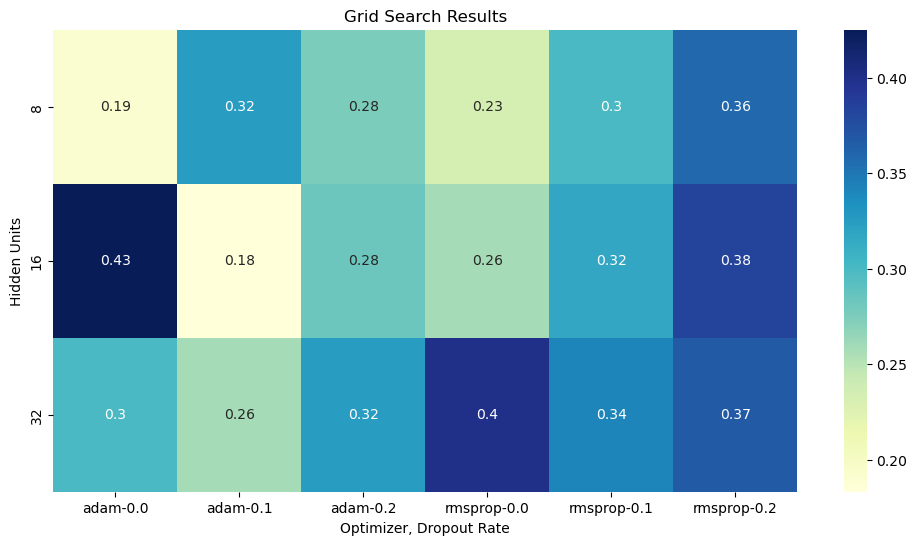

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris # Read more about IRIS Dataset here https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
iris = load_iris() 
X = iris.data
y = iris.target
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def create_model(optimizer, hidden_units, dropout_rate):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=4, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_units': [8, 16, 32],
    'dropout_rate': [0.0, 0.1, 0.2],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results.pivot_table(values='mean_test_score',
                                       index='param_hidden_units',
                                       columns=['param_optimizer', 'param_dropout_rate'])
plt.figure(figsize=(12, 6))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu')
plt.title("Grid Search Results")
plt.xlabel("Optimizer, Dropout Rate")
plt.ylabel("Hidden Units")
plt.show()

## Question 1
Import **ONE** Dataset from: 
- Kaggle https://www.kaggle.com/datasets
- SKLearn https://scikit-learn.org/stable/datasets.html
- HuggingFace https://huggingface.co/docs/datasets/index
- ...

Then implement **ONE** Neural Network
- Hugging Face https://huggingface.co
- Pytorch https://pytorch.org/vision/stable/models.html
- ...

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [5]:
# Implement Question 1 here

df = pd.read_csv("/kaggle/input/genres-v2-spotify/genres_v2.csv")
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [6]:
df.iloc[:,:20]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [8]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [9]:
df = df.drop(["type","type","id","uri","track_href","analysis_url","song_name", "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1) 
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [10]:
x = df.drop('genre', axis=1)
y = df["genre"]

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42, shuffle = True)

In [12]:
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

In [24]:
xtrain.shape

(33844, 11)

In [13]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dark Trap': 0, 'Emo': 1, 'Hiphop': 2, 'Pop': 3, 'Rap': 4, 'RnB': 5, 'Trap Metal': 6, 'Underground Rap': 7, 'dnb': 8, 'hardstyle': 9, 'psytrance': 10, 'techhouse': 11, 'techno': 12, 'trance': 13, 'trap': 14}


***Neural Network***

In [58]:
def create_model(hp):
    
    num_hidden_layers = 1
    num_units = 8
    dropout_rate = 0.2
    learning_rate = 0.01
    
    if hp:
        num_hidden_layers = hp.Choice('num_hidden_layers',values=[1,2,3])
        num_units = hp.Choice('num_units',values=[8,16,32])
        dropout_rate = hp.Float('dropout_rate', min_value=0.1,max_value=0.5)
        learning_rate = hp.Float('learning_rate', min_value=0.0001,max_value=0.01)

    model = tf.keras.models.Sequential()
    #model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(xtrain.shape[1],)))
    model.add(tf.keras.layers.Input(shape=xtrain.shape[1]))
    
    for _ in range(0,num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_units, activation='relu', use_bias=True))
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.BatchNormalization())
        
    model.add(tf.keras.layers.Dense(max(ytrain)+1,activation='softmax'))
    
    model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=['accuracy']
  )
    
    return model


In [59]:
create_model(None).summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 96        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 15)                135       
                                                                 
Total params: 263
Trainable params: 247
Non-trainable params: 16
_________________________________________________________________


> model = keras.Sequential([ 
  keras.layers.Input(name = "input", shape = (xtrain.shape[1])),  
  keras.layers.Dense(256, activation = "relu"),
  keras.layers.BatchNormalization(), 
  keras.layers.Dropout(0.2), 
  keras.layers.Dense(128, activation = "relu"),   
  keras.layers.BatchNormalization(), 
  keras.layers.Dropout(0.2), 
  keras.layers.Dense(64, activation = "relu"), 
  keras.layers.Dense(max(ytrain)+1, activation = "softmax") 
]) 
model.summary()

## Question 2
Implement **ONE** of these Tuners
- Bayesian Optimisation
- Evolutionary Algorithms
- Gradient-Based Optimisation
- Keras Tuner
- Population-based Optimisation
- ParamILS
- Random Search
- ...

Using at least **THREE** of these hyperparameters
- Learning Rate
- Loss Function
- Layer Size
- Layer Params
- Weight Initialization
- Weight of Regularization
- Model Depth
- Optimizer
- Optimizer Params
- Batch Size
- ...

In [50]:
import kerastuner

In [60]:
# Implement Question 2 here

class CustomTuner(kerastuner.tuners.BayesianOptimization):
    def run_trial(self,trial,*args,**kwargs):
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size',32,128, step=32)
        super(CustomTuner,self).run_trial(trial,*args,**kwargs)
        
        model = self.hypermodel.build(trial.hyperparameters)
        metrics = model.evaluate(xtest, ytest)
        
        return metrics


In [61]:
tuner = CustomTuner(
    create_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_tune_logs',
    project_name='spotify_genre',
    overwrite=True
)

In [62]:
early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True) 
early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10, restore_best_weights = True) 

In [63]:
tuner.search(
    xtrain, ytrain,
    validation_data=(xtest,ytest),
    epochs=5,verbose=True,
    callbacks=[early_stopping1, early_stopping2]
)

Trial 10 Complete [00h 00m 17s]
val_accuracy: 1.385553551837802

Best val_accuracy So Far: 1.4705221690237522
Total elapsed time: 00h 02m 02s


In [64]:
tuner.results_summary(5)

Results summary
Results in my_tune_logs/spotify_genre
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 8
dropout_rate: 0.4662001536322099
learning_rate: 0.0015693635938866224
batch_size: 96
Score: 1.4705221690237522

Trial 02 summary
Hyperparameters:
num_hidden_layers: 2
num_units: 32
dropout_rate: 0.2788005161270251
learning_rate: 0.005027999785461568
batch_size: 32
Score: 1.4217050224542618

Trial 05 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 16
dropout_rate: 0.3606413924451829
learning_rate: 0.005900010785428552
batch_size: 128
Score: 1.4194331355392933

Trial 04 summary
Hyperparameters:
num_hidden_layers: 2
num_units: 8
dropout_rate: 0.4894107082550948
learning_rate: 0.0056861953991898025
batch_size: 32
Score: 1.419413112103939

Trial 00 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 32
dropout_rate: 0.41139119223448006
learning_rate: 0.005618484398236503
batch_size: 32
S

In [65]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 15)                135       
                                                                 
Total params: 263
Trainable params: 247
Non-trainable params: 16
_________________________________________________________________


In [66]:
_ = model.fit(
    xtrain, ytrain,
    validation_data = (xtest, ytest),
    epochs=20,batch_size=96,
    callbacks=[early_stopping1, early_stopping2]
)

Epoch 1/20
353/353 [==============================] - 2s 3ms/step - loss: 2.2753 - accuracy: 0.2145 - val_loss: 2.0724 - val_accuracy: 0.3236
Epoch 2/20
353/353 [==============================] - 1s 2ms/step - loss: 2.2607 - accuracy: 0.2222 - val_loss: 2.0462 - val_accuracy: 0.3284
Epoch 3/20
353/353 [==============================] - 1s 2ms/step - loss: 2.2607 - accuracy: 0.2216 - val_loss: 2.0526 - val_accuracy: 0.3393
Epoch 4/20
353/353 [==============================] - 1s 2ms/step - loss: 2.2592 - accuracy: 0.2214 - val_loss: 2.0294 - val_accuracy: 0.3365
Epoch 5/20
353/353 [==============================] - 1s 2ms/step - loss: 2.2434 - accuracy: 0.2302 - val_loss: 2.0071 - val_accuracy: 0.3584
Epoch 6/20
353/353 [==============================] - 1s 2ms/step - loss: 2.2055 - accuracy: 0.2467 - val_loss: 1.9751 - val_accuracy: 0.3842
Epoch 7/20
353/353 [==============================] - 1s 2ms/step - loss: 2.1896 - accuracy: 0.2512 - val_loss: 1.9465 - val_accuracy: 0.4078
Epoch 

In [70]:
print(model.evaluate(xtrain, ytrain)) 
print(model.evaluate(xtest, ytest))

1058/1058 [==============================] - 2s 1ms/step - loss: 1.8993 - accuracy: 0.4113
[1.8992770910263062, 0.41132843494415283]
265/265 [==============================] - 0s 1ms/step - loss: 1.9035 - accuracy: 0.4115
[1.9035478830337524, 0.4115352928638458]


## Question 3
Visualize the result using **ONE** library:
- Seaborn https://seaborn.pydata.org/examples/index.html
- ...

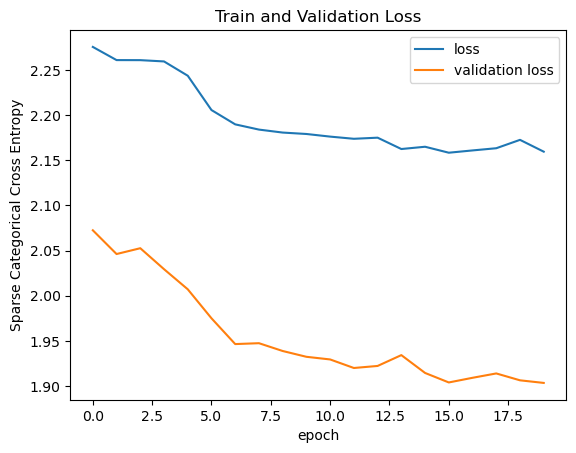

In [75]:
# Implement Question 3 here

import matplotlib.pyplot as plt

plt.plot(_.history["loss"]) 
plt.plot(_.history["val_loss"]) 
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch") 
plt.ylabel("Sparse Categorical Cross Entropy") 
plt.show()

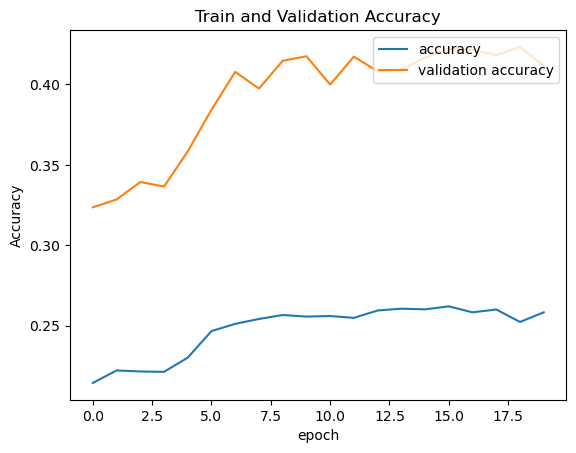

In [76]:
plt.plot(_.history["accuracy"])
plt.plot(_.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right") 
plt.title("Train and Validation Accuracy") 
plt.xlabel("epoch") 
plt.ylabel("Accuracy") 
plt.show()

In [77]:
numToPredict = 4
predictMe = df.drop('genre', axis = 1).iloc[0:numToPredict]
print(predictMe)
ypred = model.predict(scalerx.transform(predictMe)).argmax(axis=1)
print('Prediction in Numerical ', ypred)
print('Prediction in Text ', le.inverse_transform(ypred))
print('Actual Value ', df.iloc[0:numToPredict]['genre'].to_numpy())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   

   instrumentalness  liveness  valence    tempo  
0          0.013400    0.0556   0.3890  156.985  
1          0.000000    0.1180   0.1240  115.080  
2          0.000004    0.3720   0.0391  218.050  
3          0.000000    0.1140   0.1750  186.948  
1/1 [==============================] - 0s 71ms/step
Prediction in Numerical  [7 7 8 0]
Prediction in Text  ['Underground Rap' 'Underground Rap' 'dnb' 'Dark Trap']
Actual Value  ['Dark Trap' 'Dark Trap' 'Dark Trap' 'Dark Trap']


In [87]:
pred = model.predict(xtest[5].reshape(1,-1)).argmax(axis=1)
pred_text = le.inverse_transform(pred)
pred_text[0]

1/1 [==============================] - 0s 26ms/step


'psytrance'

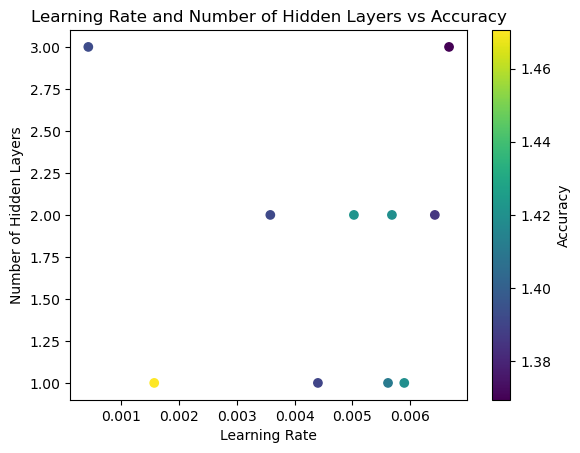

In [105]:
import matplotlib.pyplot as plt

learning_rates = []
num_hidden_layers = []
accuracies = []

for trial in tuner.oracle.get_best_trials(num_trials=10):
    hyperparameters = trial.hyperparameters.values
    learning_rates.append(hyperparameters['learning_rate'])
    num_hidden_layers.append(hyperparameters['num_hidden_layers'])
    accuracies.append(trial.metrics.get_best_value('val_accuracy'))

    
plt.scatter(learning_rates, num_hidden_layers, c=accuracies, cmap='viridis')
plt.colorbar(label='Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Hidden Layers')
plt.title('Learning Rate and Number of Hidden Layers vs Accuracy')
plt.show()
